# Datensatz einlesen

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os.path import dirname
import datetime as dt
from random import randint

notebook_path = os.path.abspath("Notebook_Cedrik_Datenexploration.ipynb")
csv_path = os.path.join(os.path.dirname(dirname(notebook_path)), "data/ks-project-edited-numpy-pandas.csv")

In [19]:
df = pd.read_csv (csv_path, low_memory=False)
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,59
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,60
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,45
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,30
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,56


# Anforderungen an Projektumsetzung: Datenexploration

### Line Chart

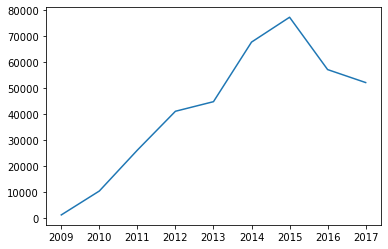

In [20]:
# Get all launch years
df['launched'] = pd.to_datetime(df['launched'])
launchYears = df['launched'].dt.year.unique()
launchYears = np.sort(launchYears) 
launchYears = np.delete(launchYears, [0,10])
launchesPerYearArray = []

for year in launchYears:
    
    launchedProjects = df[df['launched'].dt.year == year]
    numberOflaunchedProjects = launchedProjects.shape[0]
    launchesPerYearArray.append(numberOflaunchedProjects)

launchesPerYearNpArray = np.array(launchesPerYearArray)
plt.plot(launchYears, launchesPerYearNpArray)

### Scatter-Plot

In [21]:
df_filtered = df[df['main_category'] == 'Technology']

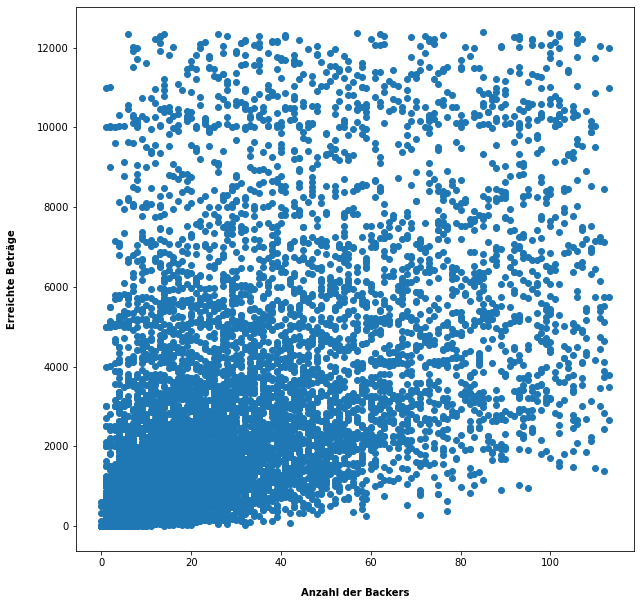

In [22]:
Q1p = df_filtered['pledged'].quantile(0.25)
Q2p = df_filtered['pledged'].quantile(0.75)
upper_threshold_p = Q2p + 1.5 * (Q2p - Q1p)

Q1b = df_filtered['backers'].quantile(0.25)
Q2b = df_filtered['backers'].quantile(0.75)
upper_threshold_b = Q2b + 1.5 * (Q2b - Q1b)

df_threshold = df_filtered[(df_filtered['pledged'] <= upper_threshold_p) & (df_filtered['backers'] <= upper_threshold_b)]
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df_threshold['backers'], df_threshold['pledged'])
plt.xlabel('Anzahl der Backers', fontweight="bold", labelpad=20)
plt.ylabel("Erreichte Beträge", fontweight="bold", labelpad=20)
plt.show()

### Blox-Plot

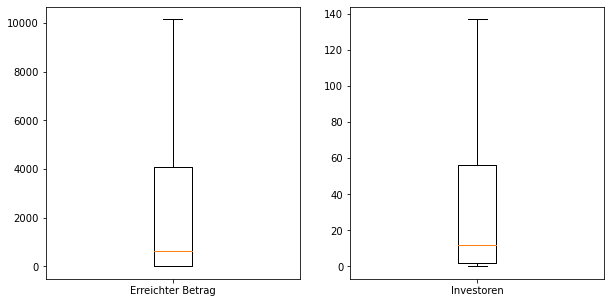

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].boxplot(df['pledged'], labels=['Erreichter Betrag'], showfliers=False)
ax[1].boxplot(df['backers'], labels=['Investoren'], showfliers=False)
plt.show()

### Bar-Chart

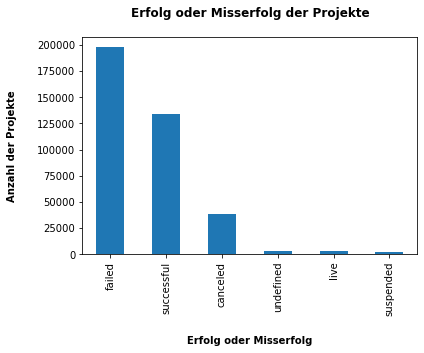

In [24]:
df['state'].nunique()

df['state'].value_counts().plot(kind='bar')
plt.title("Erfolg oder Misserfolg der Projekte", fontweight="bold", fontsize=12, pad=20)
plt.xlabel('Erfolg oder Misserfolg', fontweight="bold", labelpad=20)
plt.ylabel("Anzahl der Projekte", fontweight="bold", labelpad=20)
plt.show()

### Histogram

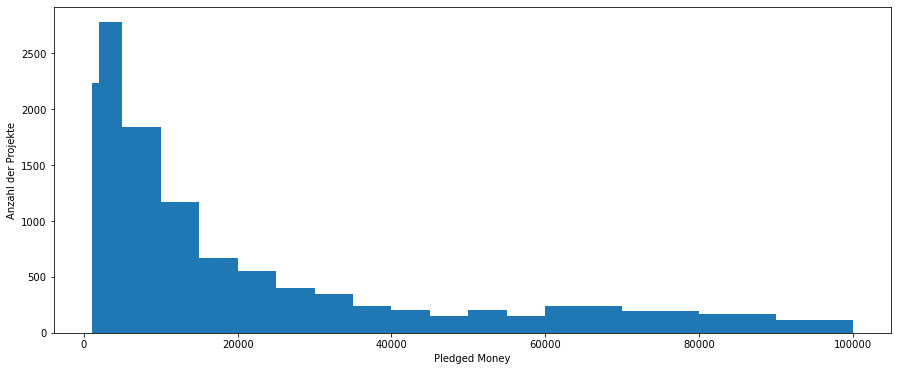

In [25]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlabel('Pledged Money')
ax.set_ylabel('Anzahl der Projekte')
ax.hist(df_filtered['pledged'], bins=[1000, 2000, 5000, 10000, 15000, 20000,25000,30000,35000,40000,45000,50000,55000,60000,70000,80000,90000,100000])
plt.show()

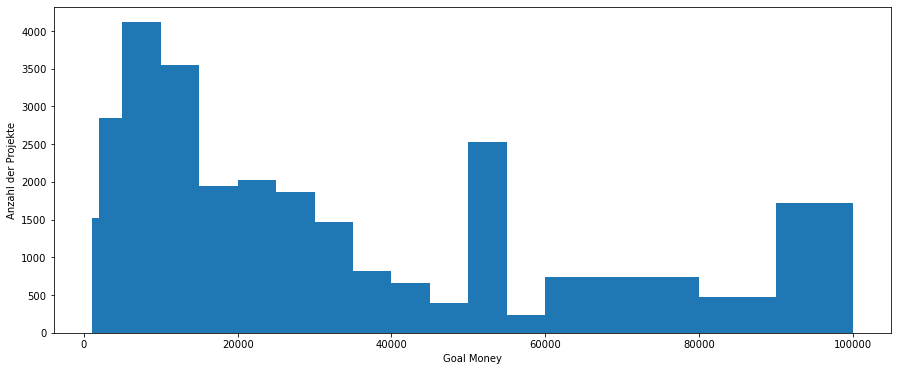

In [26]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlabel('Goal Money')
ax.set_ylabel('Anzahl der Projekte')
ax.hist(df_filtered['goal'], bins=[1000, 2000, 5000, 10000, 15000, 20000,25000,30000,35000,40000,45000,50000,55000,60000,70000,80000,90000,100000])
plt.show()

In [27]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,duration
count,378661.00000,378661.00000,378661.00000,378661.00000,374864.00000,378661.00000,378661.00000,378661.00000
mean,1074731191.98876,49080.79152,9682.97934,105.61748,7036.72887,9058.92407,45454.40147,34.48110
std,619086204.32263,1183391.25909,95636.01000,907.18503,78639.74531,90973.34311,1152950.05509,65.90917
min,5971.00000,0.01000,0.00000,0.00000,0.00000,0.00000,0.01000,1.00000
25%,538263516.00000,2000.00000,30.00000,2.00000,16.98000,31.00000,2000.00000,30.00000
50%,1075275634.00000,5200.00000,620.00000,12.00000,394.72000,624.33000,5500.00000,30.00000
75%,1610148624.00000,16000.00000,4076.00000,56.00000,3034.09000,4050.00000,15500.00000,37.00000
max,2147476221.00000,100000000.00000,20338986.27000,219382.00000,20338986.27000,20338986.27000,166361390.71000,16739.00000


### Scatter Plot

In [131]:
df_grouped_avg = df.groupby('main_category',as_index=False).mean()
df_grouped_avg

,main_category,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,duration
0,Art,1.077788e+09,40829.180144,3606.970044,42.205094,2534.057110,3220.986968,39198.575879,33.136327
1,Comics,1.063611e+09,20243.646297,6899.311189,134.771236,5344.016859,6610.443828,19571.430669,34.156854
2,Crafts,1.078527e+09,11592.285901,2016.153947,27.283687,1179.190619,1632.907282,10434.466228,31.590078
3,Dance,1.075450e+09,10321.331290,3690.798684,42.801221,2962.990149,3452.946356,9588.328548,33.102176
4,Design,1.078300e+09,46733.630260,27119.751279,241.299634,17033.026574,24417.034698,41871.388591,34.982208
5,Fashion,1.069690e+09,24818.246005,6549.031814,61.447800,4279.731233,5712.450839,22412.409361,32.856548
6,Film & Video,1.074967e+09,84334.009667,6362.733853,66.015208,5532.577810,6157.978427,82625.292254,35.748746
7,Food,1.081894e+09,48693.745411,5340.163268,54.172466,4209.934253,5113.669716,49039.620804,34.078408
8,Games,1.072129e+09,50711.298323,21865.173174,321.785615,16306.194882,21041.903140,44923.741408,32.553660
9,Journalism,1.076352e+09,88783.576925,3218.085216,38.294637,2156.545440,2615.702568,86003.395014,34.576025


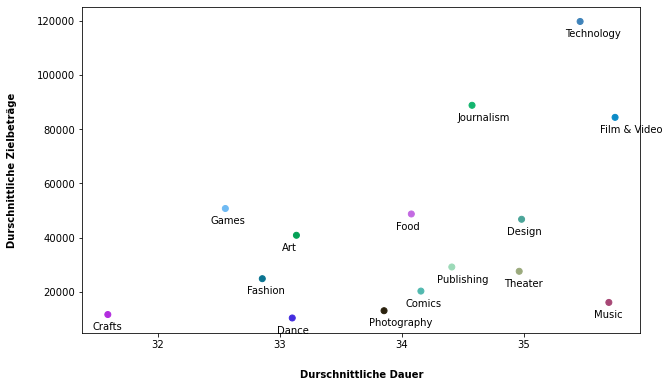

In [138]:
colors = []
for i in range(df_grouped_avg['duration'].size):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
    
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_grouped_avg['duration'], df_grouped_avg['goal'], c=colors)
plt.xlabel('Durschnittliche Dauer', fontweight="bold", labelpad=20)
plt.ylabel("Durschnittliche Zielbeträge", fontweight="bold", labelpad=20)

for key, row in df_grouped_avg.iterrows():
    ax.annotate(row['main_category'], xy=(row['duration'], row['goal']), xycoords='data',
            xytext=(-15, -15), textcoords='offset points', size=10)
    
plt.show()

In [268]:
df_successful = df[df['state'] == 'successful']
df_successful['launched'] = pd.to_datetime(df_successful['launched'])
df_successful['year'] = df_successful['launched'].dt.year
func = lambda x: 100*x.count()/df_successful.shape[0]
df_pivot_years = df_successful.pivot_table(index='year', columns='main_category', values='state', margins=True, aggfunc='count', fill_value=0.0)
df_pivot_years

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,All
year,,,,,,,,,,,,,,,,
2009,77,12,4,3,8,4,124,17,23,20,157,31,57,19,23,579
2010,382,110,19,108,69,43,1473,120,70,68,1295,190,222,65,359,4593
2011,1189,268,46,299,302,186,3317,258,284,67,3763,331,758,140,963,12171
2012,1694,548,126,368,760,435,3771,682,941,88,4944,407,1639,325,1164,17892
2013,1684,753,213,388,1255,776,4029,947,1490,81,3770,443,1951,672,963,19415
2014,1783,820,381,413,1718,978,3599,1385,1984,172,3127,543,2050,1143,1011,21107
2015,1707,994,526,293,2046,1094,3004,1171,2263,248,2611,539,1973,1601,901,20971
2016,1311,1097,401,262,2131,926,2402,791,2592,145,2419,469,1849,1307,664,18766
2017,1683,1240,399,204,2261,1151,1904,714,2871,123,2111,352,1801,1162,486,18462


In [269]:
df_pivot_years = df_pivot_years.div( df_pivot_years.iloc[:,-1], axis=0)
df_pivot_years = df_pivot_years.drop(index='All', columns='All')
df_pivot_years = round(df_pivot_years*100, 2)
df_pivot_years

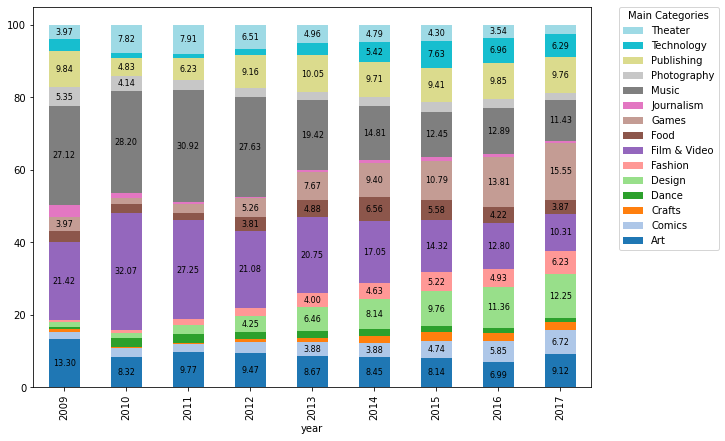

In [282]:
ax = df_pivot_years.plot.bar(stacked=True, colormap='tab20', figsize=(10,7))

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 3.50:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Main Categories', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)        